In [ ]:
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.gridspec import GridSpec
%matplotlib inline


In [3]:
%pip install --upgrade pip
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [43]:
df= pds.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv', delimiter=',')
# df = pds.read_csv('../dataset/global_CO2_emissions/global_CO2_emissions.csv') , index_col='year'
df2 = pds.read_excel('../dataset/global_CO2_emissions/global_energy_review_CO2_emissions_in 2021_data.xlsx')
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [ ]:
# df['year'] = pds.to_datetime(df['year'])
df.year

In [22]:
# df['year'] = pds.to_datetime(df['year'], format='%d/%m/%Y')

df['year'] = pds.to_datetime(df['year'])
# df.info()

In [23]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1970-01-01 00:00:00.000001850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1970-01-01 00:00:00.000001851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1970-01-01 00:00:00.000001852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1970-01-01 00:00:00.000001853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1970-01-01 00:00:00.000001854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,1970-01-01 00:00:00.000002017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,1970-01-01 00:00:00.000002018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,1970-01-01 00:00:00.000002019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,1970-01-01 00:00:00.000002020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [29]:
df_grouped = df.copy()

In [30]:
# Group the dataframe by the 'B' column
df_grouped = df_grouped.groupby('year').median() #.apply(list)

df_grouped

# df_mod_ind = df_drop_iso.copy()
# df_mod_ind.tail()

/tmp/ipykernel_1728/1537333486.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_grouped.groupby('year').median() #.apply(list)


,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
year,,,,,,,,,,,,,,,,,,,,,
1750,1338281.0,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0390,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1754,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0390,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,6266661.0,9.737886e+10,0.6575,0.0795,13.7575,0.0820,1.7920,33.222,0.081,1.2485,...,0.946,0.0,0.0080,0.014,0.054,0.731,46.30,38.97,2.4755,7.4805
2018,6443337.0,1.014988e+11,0.6865,0.0840,14.6800,0.0070,0.4560,32.742,0.007,0.2345,...,0.938,0.0,0.0090,0.013,0.054,0.716,47.43,39.88,3.5110,10.5760
2019,6530029.0,NaN,0.6500,0.0810,13.9855,0.0110,0.8175,31.762,0.000,0.0000,...,0.930,0.0,0.0100,0.008,0.055,0.700,46.36,41.24,2.4020,10.5675


In [32]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 1750 to 2021
Data columns (total 71 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   population                                 227 non-null    float64
 1   gdp                                        199 non-null    float64
 2   cement_co2                                 272 non-null    float64
 3   cement_co2_per_capita                      227 non-null    float64
 4   co2                                        272 non-null    float64
 5   co2_growth_abs                             271 non-null    float64
 6   co2_growth_prct                            271 non-null    float64
 7   co2_including_luc                          172 non-null    float64
 8   co2_including_luc_growth_abs               171 non-null    float64
 9   co2_including_luc_growth_prct              171 non-null    float64
 10  co2_including_luc_per_

In [37]:
# Convert string index to datetime index
df_grouped.index.name = 'Year'
df_grouped = df_grouped.set_index('Year')
df_grouped.info()
# df = pds.to_datetime(df.year)
# Resample to monthly and forward fill missing values
df_monthly = df_grouped.resample('M').ffill()
df_monthly
# df.year.info()


KeyError: "None of ['Year'] are in the columns"

### Data Exploration

In [5]:
# pds.options.display.max_columns = None
# pds.options.display.max_rows = None
df
# df2

,country,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
year,,,,,,,,,,,,,,,,,,,,,
1850,Afghanistan,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1851,Afghanistan,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
1852,Afghanistan,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
1853,Afghanistan,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
1854,Afghanistan,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Zimbabwe,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,19.086,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
2018,Zimbabwe,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,20.626,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
2019,Zimbabwe,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,19.432,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795


In [6]:
df.shape


(46523, 73)

In [7]:
df.describe()

,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,3.857400e+04,1.455100e+04,24974.000000,22714.000000,31349.000000,28944.000000,25032.00000,24212.000000,23909.000000,24129.000000,...,2386.000000,15980.000000,21990.000000,39388.000000,23421.000000,2386.000000,6149.000000,6149.000000,4259.000000,4258.000000
mean,6.005374e+07,2.679977e+11,8.386360,0.063951,379.988086,5.713769,20.49020,498.910897,7.199529,12.066795,...,20.419026,2.031528,2.823148,2.557844,3.325418,20.674301,771.485168,748.578502,-8.700524,20.463351
std,3.280828e+08,2.104075e+12,63.013581,0.123027,1799.875801,58.766151,699.58006,2079.556855,92.510589,704.258988,...,34.055772,8.955692,13.680777,10.088827,12.789886,34.319489,3553.425123,3488.004825,269.211180,53.737502
min,2.100000e+01,4.998000e+07,0.000000,0.000000,0.000000,-1818.472000,-100.00000,-187.032000,-2317.996000,-36941.664000,...,0.000000,0.000000,0.000000,-6.498000,0.000000,0.000000,-186.550000,0.010000,-2354.781000,-98.279000
25%,3.808912e+05,7.530493e+09,0.000000,0.000000,0.125000,0.000000,-0.54300,4.652750,-0.575000,-3.588000,...,0.231000,0.000000,0.000000,0.001000,0.005000,0.339000,8.440000,7.030000,-3.148000,-6.495750
50%,2.509282e+06,2.605900e+10,0.010000,0.005000,3.109000,0.015000,3.78750,24.430000,0.062000,0.905000,...,1.159500,0.000000,0.000000,0.072000,0.061000,1.583500,38.050000,30.600000,1.484000,8.875000
75%,9.996447e+06,1.134711e+11,0.691750,0.087000,43.660000,0.773000,10.58075,113.395750,2.320000,5.721000,...,23.403500,0.051000,0.123000,0.485000,0.518000,22.523500,151.150000,131.320000,9.029500,32.949250
max,7.909295e+09,1.136302e+14,1672.592000,2.574000,37123.852000,1859.764000,102318.50800,41639.840000,2228.633000,76500.000000,...,100.000000,100.000000,100.000000,100.829000,100.000000,100.000000,49758.230000,48116.559000,2211.852000,607.521000


In [8]:
print('The length of column Country: ', len(df.country.unique()))
# print('The length of column year: ', len(df.year.unique()), '\n')
print('Country:-> \n', df.country.value_counts(), "\n")

The length of column Country:  269
Country:-> 
 South America                     272
Singapore                         272
Iceland                           272
United Kingdom                    272
European Union (28)               272
                                 ... 
Kosovo                             14
French Equatorial Africa (GCP)      9
French West Africa (GCP)            9
Leeward Islands (GCP)               7
Kuwaiti Oil Fires (GCP)             1
Name: country, Length: 269, dtype: int64 



In [9]:
df.country.unique()


array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Aland Islands',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmar

In [10]:
df.columns

Index(['country', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_change_co2_pe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46523 entries, 1850 to 2021
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   iso_code                                   39862 non-null  object 
 2   population                                 38574 non-null  float64
 3   gdp                                        14551 non-null  float64
 4   cement_co2                                 24974 non-null  float64
 5   cement_co2_per_capita                      22714 non-null  float64
 6   co2                                        31349 non-null  float64
 7   co2_growth_abs                             28944 non-null  float64
 8   co2_growth_prct                            25032 non-null  float64
 9   co2_including_luc                          24212 non-null  float64
 10  co2_including_luc_gr

There are missing values


### Handling Missing Values

In [12]:
df_drop = df.copy()


In [13]:
# get a list of column names that meet the condition
cols_to_drop = df_drop.columns[(df_drop.isnull().sum() > (0.7 * df_drop.shape[0]))]

# drop the columns
df_drop.drop(columns=cols_to_drop, inplace=True)
df_drop.head()

,country,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2
year,,,,,,,,,,,,,,,,,,,,,
1850,Afghanistan,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.121,NaN,NaN,NaN,0.121,NaN
1851,Afghanistan,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.119,NaN,NaN,NaN,0.118,NaN
1852,Afghanistan,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,0.116,NaN
1853,Afghanistan,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,0.115,NaN
1854,Afghanistan,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.117,NaN,NaN,NaN,0.114,NaN


In [14]:
# Creating a checkpoint - 
df_mValues = df_drop.copy()
df_mValues.head()

,country,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2
year,,,,,,,,,,,,,,,,,,,,,
1850,Afghanistan,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.121,NaN,NaN,NaN,0.121,NaN
1851,Afghanistan,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.119,NaN,NaN,NaN,0.118,NaN
1852,Afghanistan,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,0.116,NaN
1853,Afghanistan,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,0.115,NaN
1854,Afghanistan,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.117,NaN,NaN,NaN,0.114,NaN


In [15]:
df_drop.shape

(46523, 50)

#### METHOD1: Imputation
mean, median or mode of the column, regression imputation, or k-nearest neighbor imputation

In [16]:
# fill missing values with the mean of each column
df_filled_mean = df_mValues.fillna(df.mean())
df_filled_mean

/tmp/ipykernel_1858/4160808788.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = df_mValues.fillna(df.mean())


,country,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2
year,,,,,,,,,,,,,,,,,,,,,
1850,Afghanistan,AFG,3752993.0,2.679977e+11,8.38636,0.063951,379.988086,5.713769,20.4902,498.910897,...,3.386367,6.068809,1.945119,2.759646,0.121,3.342353,2.031528,2.823148,0.121,3.325418
1851,Afghanistan,AFG,3769828.0,2.679977e+11,8.38636,0.063951,379.988086,5.713769,20.4902,498.910897,...,3.386367,6.068809,1.945119,2.759646,0.119,3.342353,2.031528,2.823148,0.118,3.325418
1852,Afghanistan,AFG,3787706.0,2.679977e+11,8.38636,0.063951,379.988086,5.713769,20.4902,498.910897,...,3.386367,6.068809,1.945119,2.759646,0.118,3.342353,2.031528,2.823148,0.116,3.325418
1853,Afghanistan,AFG,3806634.0,2.679977e+11,8.38636,0.063951,379.988086,5.713769,20.4902,498.910897,...,3.386367,6.068809,1.945119,2.759646,0.118,3.342353,2.031528,2.823148,0.115,3.325418
1854,Afghanistan,AFG,3825655.0,2.679977e+11,8.38636,0.063951,379.988086,5.713769,20.4902,498.910897,...,3.386367,6.068809,1.945119,2.759646,0.117,3.342353,2.031528,2.823148,0.114,3.325418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Zimbabwe,ZWE,14751101.0,2.194784e+10,0.46900,0.032000,9.596000,-0.937000,-8.8990,19.086000,...,0.129000,0.080000,0.000000,0.000000,0.314,0.024000,0.000000,0.000000,0.219,0.026000
2018,Zimbabwe,ZWE,15052191.0,2.271535e+10,0.55800,0.037000,11.795000,2.199000,22.9200,20.626000,...,0.127000,0.080000,0.000000,0.000000,0.314,0.025000,0.000000,0.000000,0.211,0.033000
2019,Zimbabwe,ZWE,15354606.0,2.679977e+11,0.57000,0.037000,11.115000,-0.681000,-5.7720,19.432000,...,0.126000,0.079000,0.000000,0.000000,0.313,0.025000,0.000000,0.000000,0.183,0.030000


In [17]:

# fill missing values with the k-nearest neighbor imputation using the KNNImputer from SKLearn
# but all category data in the columns must be converted to float
# from sklearn.impute import KNNImputer
# from pandas import DataFrame as dtf
# # create imputer object
# imputer = KNNImputer(n_neighbors=5)

# # impute missing values
# df_imputed = pds.DataFrame(imputer.fit_transform(df_mValues), columns=df_mValues.columns)
# df_imputed

#### METHOD2: Forward/Backward fill

In [18]:
# fill missing values with the forward fill method
df_filled_ffill = df_mValues.fillna(method='ffill')
df_filled_ffill

,country,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2
year,,,,,,,,,,,,,,,,,,,,,
1850,Afghanistan,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.121,NaN,NaN,NaN,0.121,NaN
1851,Afghanistan,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.119,NaN,NaN,NaN,0.118,NaN
1852,Afghanistan,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,0.116,NaN
1853,Afghanistan,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,0.115,NaN
1854,Afghanistan,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.117,NaN,NaN,NaN,0.114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Zimbabwe,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,19.086,...,0.129,0.080,0.0,0.0,0.314,0.024,0.0,0.0,0.219,0.026
2018,Zimbabwe,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,20.626,...,0.127,0.080,0.0,0.0,0.314,0.025,0.0,0.0,0.211,0.033
2019,Zimbabwe,ZWE,15354606.0,2.271535e+10,0.570,0.037,11.115,-0.681,-5.772,19.432,...,0.126,0.079,0.0,0.0,0.313,0.025,0.0,0.0,0.183,0.030


In [19]:
# fill missing values with the backward fill method
df_filled = df_filled_ffill.fillna(method='bfill')
df_filled

,country,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2
year,,,,,,,,,,,,,,,,,,,,,
1850,Afghanistan,AFG,3752993.0,9.421400e+09,0.000,0.000,0.015,0.070,475.000,8.039,...,0.001,0.000,0.0,0.0,0.121,0.000,0.0,0.0,0.121,0.000
1851,Afghanistan,AFG,3769828.0,9.421400e+09,0.000,0.000,0.015,0.070,475.000,8.039,...,0.001,0.000,0.0,0.0,0.119,0.000,0.0,0.0,0.118,0.000
1852,Afghanistan,AFG,3787706.0,9.421400e+09,0.000,0.000,0.015,0.070,475.000,8.039,...,0.001,0.000,0.0,0.0,0.118,0.000,0.0,0.0,0.116,0.000
1853,Afghanistan,AFG,3806634.0,9.421400e+09,0.000,0.000,0.015,0.070,475.000,8.039,...,0.001,0.000,0.0,0.0,0.118,0.000,0.0,0.0,0.115,0.000
1854,Afghanistan,AFG,3825655.0,9.421400e+09,0.000,0.000,0.015,0.070,475.000,8.039,...,0.001,0.000,0.0,0.0,0.117,0.000,0.0,0.0,0.114,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Zimbabwe,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,19.086,...,0.129,0.080,0.0,0.0,0.314,0.024,0.0,0.0,0.219,0.026
2018,Zimbabwe,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,20.626,...,0.127,0.080,0.0,0.0,0.314,0.025,0.0,0.0,0.211,0.033
2019,Zimbabwe,ZWE,15354606.0,2.271535e+10,0.570,0.037,11.115,-0.681,-5.772,19.432,...,0.126,0.079,0.0,0.0,0.313,0.025,0.0,0.0,0.183,0.030


In [20]:
df_filled.isnull().sum()

country                                      0
iso_code                                     0
population                                   0
gdp                                          0
cement_co2                                   0
cement_co2_per_capita                        0
co2                                          0
co2_growth_abs                               0
co2_growth_prct                              0
co2_including_luc                            0
co2_including_luc_growth_abs                 0
co2_including_luc_growth_prct                0
co2_including_luc_per_capita                 0
co2_including_luc_per_gdp                    0
co2_per_capita                               0
co2_per_gdp                                  0
coal_co2                                     0
coal_co2_per_capita                          0
cumulative_cement_co2                        0
cumulative_co2                               0
cumulative_co2_including_luc                 0
cumulative_co

#### METHOD3: Interpolation

In [21]:
# interpolate missing values using the linear method
df_interpolated = df_mValues.interpolate()
df_interpolated

,country,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2
year,,,,,,,,,,,,,,,,,,,,,
1850,Afghanistan,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.121,NaN,NaN,NaN,0.121,NaN
1851,Afghanistan,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.119,NaN,NaN,NaN,0.118,NaN
1852,Afghanistan,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,0.116,NaN
1853,Afghanistan,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,0.115,NaN
1854,Afghanistan,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.117,NaN,NaN,NaN,0.114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Zimbabwe,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,19.086,...,0.129,0.080,0.0,0.0,0.314,0.024,0.0,0.0,0.219,0.026
2018,Zimbabwe,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,20.626,...,0.127,0.080,0.0,0.0,0.314,0.025,0.0,0.0,0.211,0.033
2019,Zimbabwe,ZWE,15354606.0,2.271535e+10,0.570,0.037,11.115,-0.681,-5.772,19.432,...,0.126,0.079,0.0,0.0,0.313,0.025,0.0,0.0,0.183,0.030


In [22]:
# interpolate missing values using the polynomial method
# df_interpolated_poly = df_mValues.interpolate(method='polynomial', order=2)
# df_interpolated_poly

### contd

In [40]:
df_filled.head()

,country,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2
year,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000001850,Afghanistan,AFG,3752993.0,9.421400e+09,0.0,0.0,0.015,0.07,475.0,8.039,...,0.001,0.0,0.0,0.0,0.121,0.0,0.0,0.0,0.121,0.0
1970-01-01 00:00:00.000001851,Afghanistan,AFG,3769828.0,9.421400e+09,0.0,0.0,0.015,0.07,475.0,8.039,...,0.001,0.0,0.0,0.0,0.119,0.0,0.0,0.0,0.118,0.0
1970-01-01 00:00:00.000001852,Afghanistan,AFG,3787706.0,9.421400e+09,0.0,0.0,0.015,0.07,475.0,8.039,...,0.001,0.0,0.0,0.0,0.118,0.0,0.0,0.0,0.116,0.0
1970-01-01 00:00:00.000001853,Afghanistan,AFG,3806634.0,9.421400e+09,0.0,0.0,0.015,0.07,475.0,8.039,...,0.001,0.0,0.0,0.0,0.118,0.0,0.0,0.0,0.115,0.0
1970-01-01 00:00:00.000001854,Afghanistan,AFG,3825655.0,9.421400e+09,0.0,0.0,0.015,0.07,475.0,8.039,...,0.001,0.0,0.0,0.0,0.117,0.0,0.0,0.0,0.114,0.0


In [29]:
column_header =['iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_per_capita', 'co2_per_gdp',
       'coal_co2', 'coal_co2_per_capita', 'cumulative_cement_co2',
       'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'flaring_co2', 'flaring_co2_per_capita',
       'gas_co2', 'gas_co2_per_capita', 'land_use_change_co2',
       'land_use_change_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'share_global_cement_co2', 'share_global_co2',
       'share_global_co2_including_luc', 'share_global_coal_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_co2_including_luc',
       'share_global_cumulative_coal_co2',
       'share_global_cumulative_flaring_co2',
       'share_global_cumulative_gas_co2', 'share_global_cumulative_luc_co2',
       'share_global_cumulative_oil_co2', 'share_global_flaring_co2',
       'share_global_gas_co2', 'share_global_luc_co2', 'share_global_oil_co2']

In [34]:
table = pds.pivot_table(df_filled, values=column_header, index='year', columns='country', aggfunc=sum)

/tmp/ipykernel_1858/619051929.py:1: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  table = pds.pivot_table(df_filled, values=column_header, index='year', columns='country', aggfunc=sum)


In [33]:
table.columns.value_counts()

(cement_co2, Afghanistan)                          1
(share_global_cement_co2, Faeroe Islands)          1
(share_global_cement_co2, Fiji)                    1
(share_global_cement_co2, Finland)                 1
(share_global_cement_co2, France)                  1
                                                  ..
(cumulative_co2_including_luc, North Macedonia)    1
(cumulative_co2_including_luc, Norway)             1
(cumulative_co2_including_luc, OECD (GCP))         1
(cumulative_co2_including_luc, Oceania)            1
(share_global_oil_co2, Zimbabwe)                   1
Length: 12643, dtype: int64

In [ ]:
# Dataset has data for every 10 minutes and they don't change so quickly
# Grouping by month
df_grouped = df_filled.groupby(pds.Grouper(freq='y')).mean()
df_filled.head()

In [24]:
# 'China, P.R.: Hong Kong' = Hong Kong, 'China, P.R.: Mainland' = China, 'Taiwan Province of China' = Taiwan
country_name = ['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Canada', 'Chile',
       'Hong Kong', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Rep.',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Korea', "Lao People's Dem. Rep.", 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Myanmar',
       'Netherlands, The', 'New Zealand', 'Norway', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'Saudi Arabia', 'Singapore', 'Slovak', 'Slovenia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailand', 'Tunisia', 'Turkey',
       'United Kingdom', 'United States', 'Vietnam']

df_mod_country = df_filled.replace({
       'country': {
              'China, P.R.: Hong Kong' : 'Hong Kong',
              'China, P.R.: Mainland' : 'China',
              'Croatia, Rep. of' : 'Croatia',
              'Czech Rep.' : 'Czech',
              'Estonia, Rep. of' : 'Estonia',
              'Kazakhstan, Rep. of' : 'Kazakhstan',
              'Korea, Rep. of' : 'Korea',
              "Lao People's Dem. Rep." : 'Lao',
              'Netherlands, The' : 'Netherlands',
              'Poland, Rep. of' : 'Poland',
              'Russian Federation' : 'Russian',
              'Slovak Rep.' : 'Slovak',
              'Slovenia, Rep. of' : 'Slovenia',
              'Taiwan Province of China' : 'Taiwan'
       }
})

df_mod_country.country.unique()

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Aland Islands',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmar

### Outliers Identification

In [26]:
df_mod_country.describe()

,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,...,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2
count,4.652300e+04,4.652300e+04,46523.000000,46523.000000,46523.000000,46523.000000,46523.000000,46523.000000,46523.000000,46523.000000,...,46523.000000,46523.000000,46523.000000,46523.000000,46523.000000,46523.000000,46523.000000,46523.000000,46523.000000,46523.000000
mean,1.384085e+08,8.221788e+11,21.260129,0.083429,472.449558,21.778118,14.090302,838.000712,28.967975,7.981910,...,3.317951,4.519013,2.466558,3.000233,3.200079,3.147618,2.530632,2.939663,3.157710,3.010464
std,5.660642e+08,5.943177e+12,132.796025,0.130496,2470.494308,128.738085,513.708726,3319.346018,146.741875,507.262055,...,10.712535,16.589712,8.750648,12.248826,10.119024,11.525252,8.740733,11.840538,10.759612,11.228353
min,2.100000e+01,4.998000e+07,0.000000,0.000000,0.000000,-1818.472000,-100.000000,-187.032000,-2317.996000,-36941.664000,...,-0.086000,0.000000,0.000000,0.000000,-0.694000,0.000000,0.000000,0.000000,-6.498000,0.000000
25%,3.050315e+05,1.538852e+10,0.000000,0.000000,0.249000,0.000000,0.604000,4.980000,-0.086000,-0.745000,...,0.017000,0.000000,0.000000,0.000000,0.004000,0.004000,0.000000,0.000000,0.000000,0.006000
50%,2.749574e+06,6.904272e+10,0.104000,0.019000,4.619000,0.063000,4.653000,29.574000,0.233000,2.289000,...,0.123000,0.005000,0.000000,0.000000,0.121000,0.052000,0.000000,0.000000,0.077000,0.060000
75%,1.459843e+07,2.976215e+11,1.816000,0.131000,53.366500,1.576000,9.561000,183.329500,3.728000,6.774000,...,0.727000,0.326000,0.329000,0.272000,0.690000,0.469000,0.326000,0.329000,0.574000,0.467000
max,7.909295e+09,1.136302e+14,1672.592000,2.574000,37123.852000,1859.764000,102318.508000,41639.840000,2228.633000,76500.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.829000,100.000000


In [ ]:
plt.figure(figsize=(27,35*4))
gspec = GridSpec(13, 4)
# for i, cn in enumerate(dataframe_train_mean[column_features]):
for i, cn in enumerate(column_features):
  ax = plt.subplot(gspec[i])
  sns.distplot(df_mod_country[cn][df_mod_country.PhishingAttack == 1], color='b',label='Resisted')
  sns.distplot(dataframe_train_mean[cn][dataframe_train_mean.PhishingAttack == 0], color='r',label='Defrauded')
  ax.set_xlabel('')
  ax.set_title('feature: '+ str(cn))
  ax.legend()
plt.show()

array(['Accomodation and food services',
       'Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use',
       'Administrative and support services',
       'Agriculture, hunting, forestry', 'Air transport',
       'Arts, entertainment and recreation', 'Basic metals',
       'Chemicals and pharmaceutical products',
       'Coke and refined petroleum products',
       'Computer, electronic and optical products', 'Construction',
       'Education', 'Electrical equipment',
       'Electricity, gas, steam and air conditioning supply',
       'Fabricated metal products', 'Financial and insurance activities',
       'Fishing and aquaculture', 'Food products, beverages and tobacco',
       'Human health and social work activities',
       'IT and other information services',
       'Land transport and transport via pipelines',
       'Machinery and equipment n.e.c.',
       'Manufacturing nec; repair and installation of mac

In [ ]:
df_mod_country.CTS_Full_Descriptor.unique()

array(['Environment, Climate Change, Economic Activity, CO2 Emissions',
       'Environment, Climate Change, Economic Activity, CO2 Emissions Intensities',
       'Environment, Climate Change, Economic Activity, CO2 Emissions Multipliers'],
      dtype=object)

In [ ]:
# Drop 'ObjectId', 'ISO2', 'ISO3', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Scale'
df_drop_iso = df_mod_country.drop(['ObjectId', 'ISO2', 'ISO3', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Scale'], axis=1)
df_drop_iso.head(4)

,Country,Indicator,Unit,Industry,F1995,F1996,F1997,F1998,F1999,F2000,...,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018
0,Argentina,CO2 emissions,Millions of Metric tons of CO2,Accomodation and food services,0.159,0.158,0.163,0.17,0.175,0.183,...,0.284,0.319,0.338,0.377,0.378,0.369,0.371,0.303,0.358,0.344
1,Argentina,CO2 emissions,Millions of Metric tons of CO2,Activities of households as employers; undiffe...,0.000,0.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,Argentina,CO2 emissions,Millions of Metric tons of CO2,Administrative and support services,0.326,0.351,0.363,0.36,0.336,0.338,...,0.725,0.738,0.765,0.777,0.840,0.794,0.852,0.789,0.846,0.857
3,Argentina,CO2 emissions,Millions of Metric tons of CO2,"Agriculture, hunting, forestry",8.914,9.580,9.625,9.18,9.124,9.020,...,13.804,14.110,14.616,14.120,15.358,13.728,14.273,13.838,14.121,13.067


In [ ]:
#  Analyzing the Categorical values in the non-numerical value fields

print("Country Field -> \n", df_drop_iso.Country.value_counts(), "\n")
print("Indicator Field -> \n", df_drop_iso.Indicator.value_counts(), "\n")
print("Unit Field -> \n", df_drop_iso.Unit.value_counts(), "\n")
print("Industry Field -> \n", df_drop_iso.Industry.value_counts(), "\n")


Country Field -> 
 Argentina     135
Romania       135
Lithuania     135
Luxembourg    135
Malaysia      135
             ... 
Ireland       135
Israel        135
Italy         135
Japan         135
Vietnam       135
Name: Country, Length: 66, dtype: int64 

Indicator Field -> 
 CO2 emissions                2970
CO2 emissions intensities    2970
CO2 emissions multipliers    2970
Name: Indicator, dtype: int64 

Unit Field -> 
 Metric Tons of CO2 Emissions per $1million USD of output    5940
Millions of Metric tons of CO2                              2970
Name: Unit, dtype: int64 

Industry Field -> 
 Accomodation and food services                                                                                                198
Mining and quarrying, energy producing products                                                                               198
Mining support service activities                                                                                             198
Mot

In [ ]:

def count_categories(Industry):

    categories = {
        'Agriculture, Fishing and Forestry':['Fishing', 'Agriculture', 'hunting', 'forestry'],
        'Transport':['Air transport', 'Land transport', 'Water transport', 'vehicles', 'motor', 'road'],
        'Health, Finance and Education':['Human health', 'Financial', 'Education'],
        'Energy sources':['electricity', 'gas', 'steam'],
        'Waste':['waste'],
        'Defence and Security':['defence', 'security'],
        'Consumable Product':['Food products', 'beverages', 'tobacco', 'medicinal chemical', 'botanical'],
        'Direct Industrial product':['metal', 'Chemicals', 'Coke', 'mineral', 'Paper', 'Rubber', 'cements', 'petroleum', 'plastic'],
        'Technology and Communication Activities':['computer', 'electronic', 'IT', 'courier', 'scientific', 'Publishing,', 'audiovisual and broadcasting', 'broadcasting', 'Telecommunications'],
        'Other industry and services':['Construction', 'Other service', 'textiles', 'wood', 'footwear', 'leather'],
        'Engineering, Machinery and Equipment':['machinery', 'equipment', 'warehouse'],
        'Mining Product and Activities':['Mining', 'quarrying'],
        'Housing and Entertainment Services':['Accommodation and food service', 'Administrative and support services', 'Real estate activities', 'Arts', 'entertainment', 'recreation', 'own use', 'Activities of households', 'entertainment']
        }

    counts = {category: 0 for category in categories}

    for value in df.Industry:
        for category, keywords in categories.items():
            if any(keyword in str(value) for keyword in keywords):
                counts[category] += 1
                break

    for category, count in counts.items():
        # print(f'{category} is {count}')
        return counts 

# counts = {category: 0 for category in categories}

# for value in df_drop_iso.Industry:
#     for category, keywords in categories.items():
#         if any(keyword in str(value) for keyword in keywords):
#             counts[category] += 1
#             break

# for category, count in counts.items():
#     print(f'{category} is {count}')
    
# df_drop_iso['new_industry'] = df_drop_iso['Industry'].apply(count_categories)

In [ ]:
def get_category(industry):
    if  ('Fishing' in str(industry)) or ('Agriculture' in str(industry)) or ('hunting' in str(industry)) or ('forestry' in str(industry)): 
        return 'Agriculture, Fishing and Forestry'
    elif('Air transport' in str(industry)) or ('Land transport' in str(industry)) or ('Water transport' in str(industry)) or ('vehicles' in str(industry)) or ('motor' in str(industry)) or ('road' in str(industry)): 
        return 'Transport'
    elif('Human health' in str(industry)) or ('Financial' in str(industry)) or ('Education' in str(industry)): 
        return 'Health, Finance and Education'
    elif('electricity' in str(industry)) or ('gas' in str(industry)) or ('steam' in str(industry)): 
        return 'Energy sources'
    elif('waste' in str(industry)): 
        return 'Waste'
    elif('defence' in str(industry)) or ('security' in str(industry)): 
        return 'Defence and Security'
    elif('Food products' in str(industry)) or ('beverages' in str(industry)) or ('tobacco' in str(industry)) or ('medicinal chemical' in str(industry)) or ('botanical' in str(industry)): 
        return 'Consumable Product'
    elif('metal' in str(industry)) or ('Chemicals' in str(industry)) or ('Coke' in str(industry)) or ('mineral' in str(industry)) or ('Paper' in str(industry)) or ('Rubber' in str(industry)) or ('cements' in str(industry)) or ('petroleum' in str(industry)) or ('plastic' in str(industry)): 
        return 'Direct Industrial product'
    elif('computer' in str(industry)) or ('electronic' in str(industry)) or ('IT' in str(industry)) or ('courier' in str(industry)) or ('scientific' in str(industry)) or ('Publishing,' in str(industry)) or ('audiovisual and broadcasting' in str(industry)) or ('broadcasting' in str(industry)) or ('Telecommunications' in str(industry)): 
        return 'Technology and Communication Activities'
    elif('Construction' in str(industry)) or ('Other service' in str(industry)) or ('textiles' in str(industry)) or ('wood' in str(industry)) or ('footwear' in str(industry)) or ('leather' in str(industry)): 
        return 'Other industry and services'
    elif('machinery' in str(industry)) or ('equipment' in str(industry)) or ('warehouse' in str(industry)) or ('Warehousing' in str(industry)): 
        return 'Engineering, Machinery and Equipment'
    elif('Mining' in str(industry)) or ('quarrying' in str(industry)): 
        return 'Mining Product and Activities'
    elif('Accomodation and food service' in str(industry)) or ('Administrative and support services' in str(industry)) or ('Real estate activities' in str(industry)) or ('Arts' in str(industry)) or ('entertainment' in str(industry)) or ('recreation' in str(industry)) or ('own use' in str(industry)) or ('Activities of households' in str(industry)) or ('entertainment' in str(industry)): 
        return 'Housing and Entertainment Services'
    

df_drop_iso['new_industry'] = df_drop_iso['Industry'].apply(get_category)


In [ ]:
df_mod_ind = df_drop_iso.copy()

In [ ]:
df_drop_iso['new_industry'].unique()

array(['Housing and Entertainment Services',
       'Agriculture, Fishing and Forestry', 'Transport',
       'Direct Industrial product',
       'Technology and Communication Activities',
       'Other industry and services', 'Health, Finance and Education',
       'Engineering, Machinery and Equipment', 'Energy sources',
       'Consumable Product', 'Mining Product and Activities',
       'Defence and Security', 'Waste'], dtype=object)

In [ ]:
df_drop_iso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       8910 non-null   object 
 1   Indicator     8910 non-null   object 
 2   Unit          8910 non-null   object 
 3   Industry      8910 non-null   object 
 4   F1995         8910 non-null   float64
 5   F1996         8910 non-null   float64
 6   F1997         8910 non-null   float64
 7   F1998         8910 non-null   float64
 8   F1999         8910 non-null   float64
 9   F2000         8910 non-null   float64
 10  F2001         8910 non-null   float64
 11  F2002         8910 non-null   float64
 12  F2003         8910 non-null   float64
 13  F2004         8910 non-null   float64
 14  F2005         8910 non-null   float64
 15  F2006         8910 non-null   float64
 16  F2007         8910 non-null   float64
 17  F2008         8910 non-null   float64
 18  F2009         8910 non-null 

In [ ]:
corr = df_mod_country.corr()
# corr.style.background_gradient(cmap='YlOrRd')
#Exploratory data analysis

colormap = plt.cm.RdBu_r
plt.figure(figsize=(20,10))
plt.title('Correlation of Features', y=1, size=15)
sns.heatmap(corr, linewidths=0.15,vmin=-1.0, vmax=1.0, 
            square=True, cmap=colormap, linecolor='blue', annot=True)

### Visualization

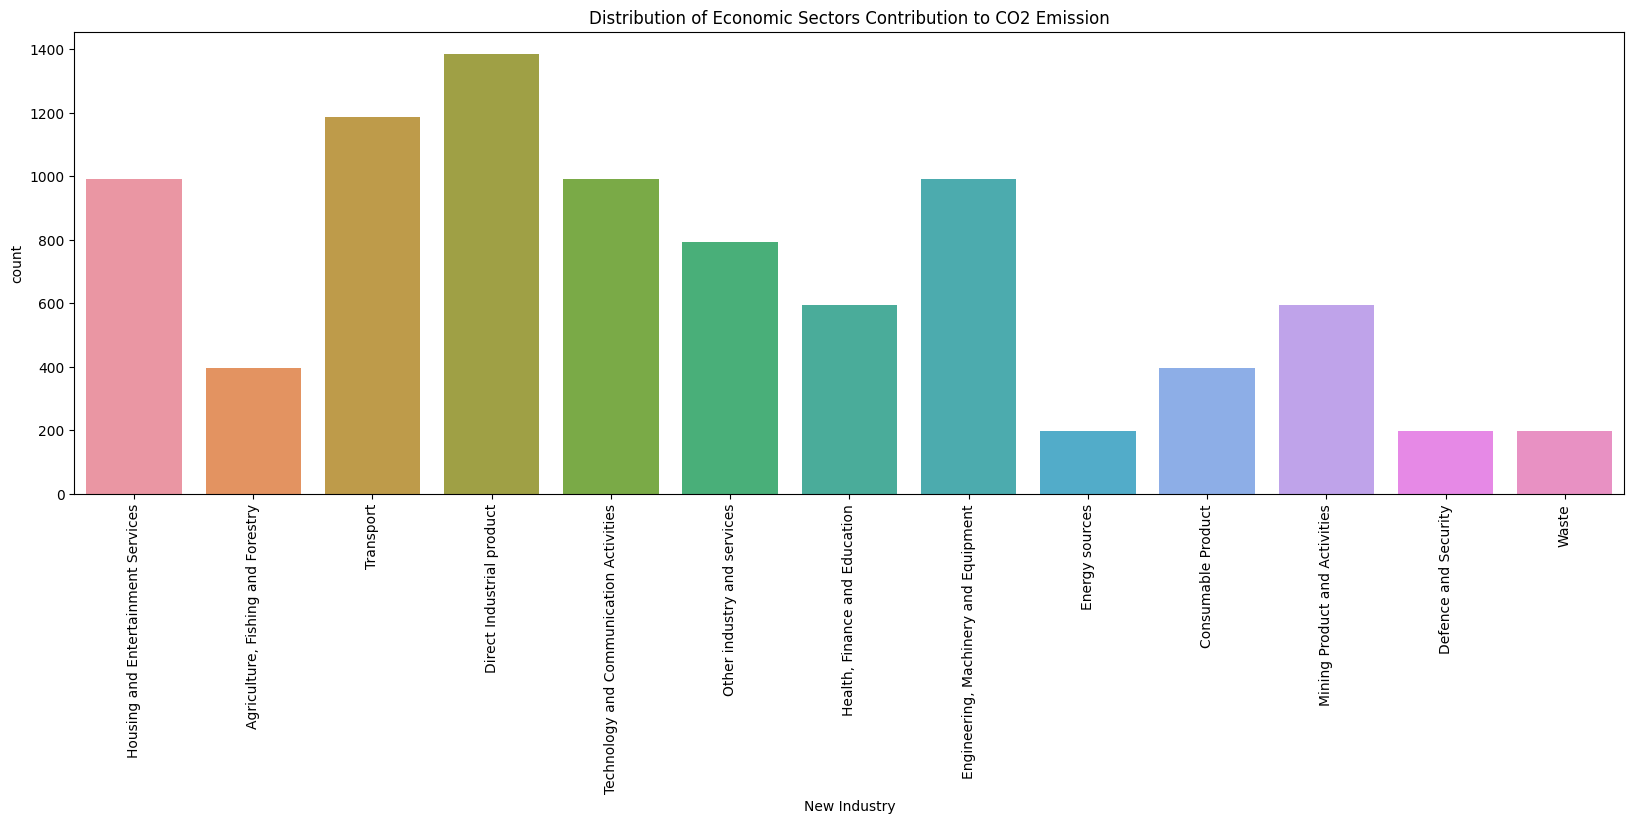

In [ ]:
# Need rework (the quantity of data for each)
plt.figure(figsize=(20,6))
xis = sns.countplot(x="new_industry", data=df_mod_ind)
plt.xticks(x=df_mod_ind['new_industry'], rotation='vertical') 
# plt.legend(
#     df_mod_ind.new_industry, 
#     title='Economic Sectors', 
#     title_fontsize=15, 
#     prop={'size':12}
#     )
plt.xlabel("New Industry")
plt.title("Distribution of Economic Sectors Contribution to CO2 Emission")
plt.show()

*   Almost all customers have been emplyed from the age of 21
*   The oldest customers are above 90yrs & both of them are retired.
*   Most of the Customers are in blue-collar or management Jobs & some are in technician & admin Jobs.




In [ ]:
# 1. Let's analyze the Age of the cusomers w.r.t Jobs
NewIndustryRangeCountry_crosstab=pds.crosstab(index=df_mod_ind['new_industry'], columns=df_mod_ind['Unit'])
NewIndustryRangeCountry_crosstab

Unit,Metric Tons of CO2 Emissions per $1million USD of output,Millions of Metric tons of CO2
new_industry,,
"Agriculture, Fishing and Forestry",264,132
Consumable Product,264,132
Defence and Security,132,66
Direct Industrial product,924,462
Energy sources,132,66
"Engineering, Machinery and Equipment",660,330
"Health, Finance and Education",396,198
Housing and Entertainment Services,660,330
Mining Product and Activities,396,198


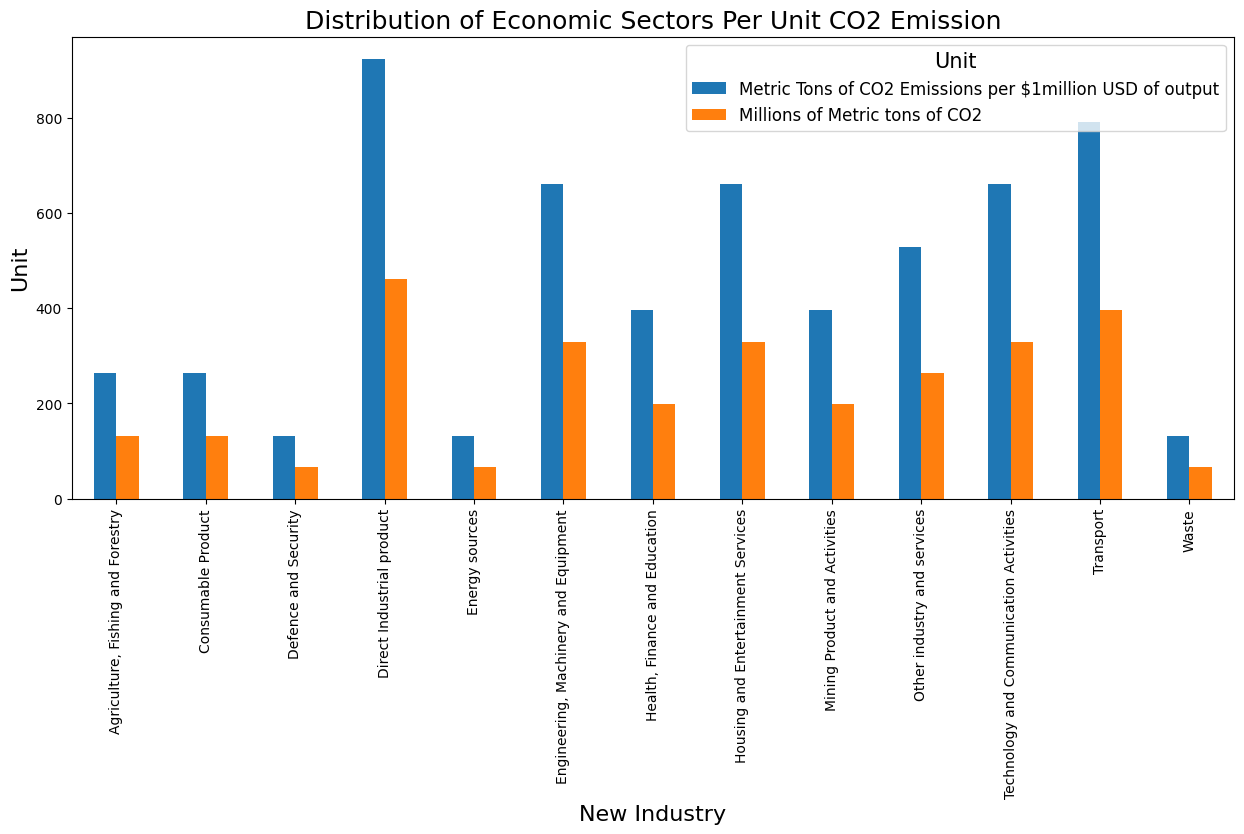

In [ ]:
# Plotting the above values

NewIndustryRangeCountry_crosstab.plot(kind='bar', stacked=False, figsize=(15,6))
plt.xticks(rotation = 'vertical')
plt.xlabel('New Industry', fontsize=16)
plt.ylabel('Unit', fontsize=16)
plt.title('Distribution of Economic Sectors Per Unit CO2 Emission', fontsize=18)
plt.legend(title="Unit", title_fontsize=15, prop={"size":12})

plt.show()

NameError: name 'Energy_sources' is not defined

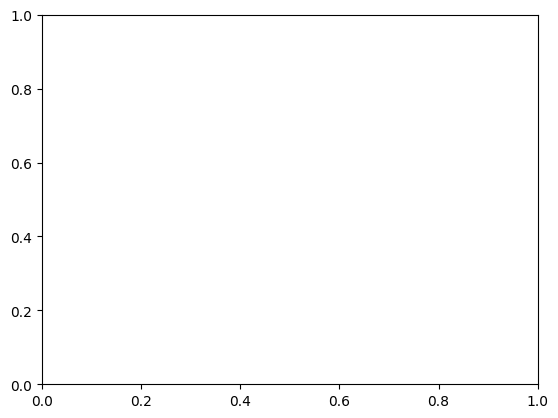

Bad pipe message: %s [b"|\xbf$\xad\x99N\xb3}\x0c\xbb\xea\x12\xea\xd0\xdf2\xfeZ\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x00", b'\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c']
Bad pipe message: %s [b"Z6#\xb4k/\xf7\xf4M\x11\xf7\x08\t\xdc\xa9q\xee>\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t\xc0\x13\x003\x002\x00\x9a\x00\x99\x00E\x00D\xc0\x07\xc0\x11\xc0\x08\

In [ ]:
# The CO2 emission time series dataset is ploted to visualize the dependency of the emission in the power generation with time.
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(x = "new_industry", y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

In [ ]:
# Next, we need to add numerical meaning to our categorical nominal values by introducing a Dummy variable -
# i.e., an explanatory binary variable that equals to 1 if a certain categorical effect is present, 
# and that equals 0 if the same is absent.

reason_columns  = pds.get_dummies(df_drop_iso['new_industry'])
reason_columns

,"Agriculture, Fishing and Forestry",Consumable Product,Defence and Security,Direct Industrial product,Energy sources,"Engineering, Machinery and Equipment","Health, Finance and Education",Housing and Entertainment Services,Mining Product and Activities,Other industry and services,Technology and Communication Activities,Transport,Waste
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,0,0,0,0,0,1,0,0,0,0,0,0,0
8906,0,0,0,0,0,0,0,0,0,0,0,0,1
8907,0,0,0,0,0,0,0,0,0,0,0,1,0
8908,0,0,0,0,0,0,0,0,0,0,0,1,0
